# Getting Started

Having administered employee surveys in large organizations (with some yielding 30k+ responses), one common issue I see is employees' concerns about pay. Items asking about pay satisfaction are almost always the lowest scoring ones, which kind of makes sense. You're essentially asking folks if they feel like they should earn more money. Not too many people would disagree there.
On top of this, companies are always hesitant to really address these concerns. I get it, it's a touchy subject. And while I believe companies should aim to pay fair wages, they can't give everyone a raise after every survey.
As a middle ground, I'm interested in seeing if an employee's perception of adequate compensation is influenced by their understanding of how that pay is calculated. In other words, when employees understand the factors that determine their pay, are they happier than those who see it as an arbitrary number pulled out of the air? To answer this, I designed a survey asking employed participants to share the extent to which they're satisfied with their pay and how well they understand its determinants.
In the cells below, I walk through the steps of cleaning the raw data file as well as the actual analyses. I use the markdown text to explain my general thought process as I go through the analysis, while the commented text in the cells is more granular and explains what specific lines of code do.

In [1]:
import pandas as pd

In [2]:
source = r"C:\Users\Ian\Desktop\data.csv"
data = pd.read_csv(source)


In [3]:
data.head()

,Unnamed: 0,Submission ID,Status,Current step,I have a best friend at work.,I'm paid fairly for the work that I do.,I would recommend my company as a great place to work.,I understand how my pay is determined.,Would you mind sharing your base pay? (Optional),Errors
0,0,aa19a064-b219-4c49-9246-5536bd95283b,finished,Ending 2,Strongly disagree,Neutral,Neutral,Strongly agree,NaN,NaN
1,1,53d971fb-870b-4f59-a09a-0352dd6140c9,finished,Ending 2,Agree,Disagree,Neutral,Disagree,NaN,NaN
2,2,8cfa687f-80ab-414e-bee2-9749a45a3159,finished,Ending 2,Strongly disagree,Disagree,Neutral,Strongly disagree,68000,NaN
3,3,5c5eef16-c228-4fe0-a679-bf56ceede5e1,finished,Ending 2,Agree,Neutral,Neutral,Neutral,57600,NaN
4,4,0cb1389f-e16f-43a8-a2c8-e861f3b2992f,finished,Ending 2,Strongly disagree,Agree,Neutral,Strongly agree,NaN,NaN


In [4]:
data.drop(data.columns[[0, 1,2,3,9]], axis =1, inplace =True) #Dropping unecessary columns e.g., "Submission ID"

In [5]:
recode = {"Strongly agree":5,              # Writing the schema I want to use to recode the agreement scale responses. 
         "Agree": 4,
         "Neutral":3,
         "Disagree":2,
         "Strongly disagree":1}

In [6]:
for i in range(0,4):                 # Applying the schema: iterating through each column to change the string type to numeric.
    data.iloc[:,i] = data.iloc[:,i].replace(recode)

Much better. The column headers below represent each question on my survey. This analysis focuses on just two questions: "I'm paid fairly for the work that I do." and "I understand how my pay is determined." (The "Best Friend..." and "Recommend.." items are for separate projects I'm interested in.)

Finally, the question about pay was an optional one I wanted to include as part of my analysis. Unfortunately, too many of the survey participants opted out of that one. 

In [7]:
data.head()

,I have a best friend at work.,I'm paid fairly for the work that I do.,I would recommend my company as a great place to work.,I understand how my pay is determined.,Would you mind sharing your base pay? (Optional)
0,1,3,3,5,NaN
1,4,2,3,2,NaN
2,1,2,3,1,68000
3,4,3,3,3,57600
4,1,4,3,5,NaN


In [8]:
# Checking for missing values 
data.isna().sum()

I have a best friend at work.                              0
I'm paid fairly for the work that I do.                    0
I would recommend my company as a great place to work.     0
I understand how my pay is determined.                     0
Would you mind sharing your base pay? (Optional)          86
dtype: int64

In [9]:
data.shape[0] #Counting the number of rows in the data frame, i.e., the number of responses I recieved. 

162

As you can see in the cell above, I received 162 responses, which is a little low. I was initially looking for about 90-100 responses per group, but I can work with this.

There will be two analyses for this:

1. I'll calculate the risk ratio to understand the likelihood that employees will be satisfied with their pay, given  their understanding of it.
2. I'll compare the two groups (Understand pay, Don't understand pay)

# Risk Ratio

To calculate the risk ratio, I'll break the responses up into 4 groups: High/low pay satisfaction and high/low pay understanding using the "Neutral" response as an dividing point:



X1 = Number of employees who understand their pay and are happy with it.

X2 = Number of employees who understand their pay but are not happy with it.

X3 = Number of employees who don’t understand their pay but are happy with it.

X4 = Number of employees who don’t understand their pay and are not happy with it.

In [10]:
x1 = data[(data["I'm paid fairly for the work that I do."]>3) & (data["I understand how my pay is determined."]> 3)].shape[0]
x2 = data[(data["I'm paid fairly for the work that I do."]<3) & (data["I understand how my pay is determined."]> 3)].shape[0]
x3 = data[(data["I'm paid fairly for the work that I do."]>3) & (data["I understand how my pay is determined."]< 3)].shape[0]
x4 = data[(data["I'm paid fairly for the work that I do."]<3) & (data["I understand how my pay is determined."]< 3)].shape[0]

Now that I have the groups broken out, I can begin crunching some numbers. I'll start off looking at a) the probability that someone is happy with their pay, given that they understand it and b) the probability that someone is happy with their pay, given a lack of understanding. 

# P(Happy with Pay | Understand Pay)


In [11]:
# This is looking at the percentage of respondents who are happy with their pay, 
# out of everyone who reported understanding it. 
r1 = x1/(x1+x2)
print("P(Happy with Pay|Understand Pay) =", round(r1, 2))

P(Happy with Pay|Understand Pay) = 0.73


# P(Happy with Pay | Don't Understand Pay) 

In [12]:
# This is calculating how many respondents are happy with their 
# pay out of everyone who reported a lack of understanding. 
r2 = x3/(x3+x4)
print("P(Happy with Pay|Don't Understand Pay) =", round(r2, 2)) 

P(Happy with Pay|Don't Understand Pay) = 0.35


So, we can see that of those who understand their pay, 73% are satisfied with it, while only 35% of those who don't understand their pay are satisfied. 

In [13]:
RR = r1/r2
print("RR = ", round(RR,2))

RR =  2.06


Finally, I used some simple division to calculate the final Risk Ratio: 2.06. This means that employees who understand their pay are more than twice as likely to be satisfied with it. 

# Calulating Confidence Intervals

As a way to check these results, I'm going to calculate the confidence intervals (CI) to find a range of true possible values. Simply put: this data is based on a select group of people who took the survey. The CIs tell give us a range of values that would, in theory, include the true risk ratio if I surveyed every employed person on the planet.

In [14]:
import math

In [15]:
SE = math.sqrt((1/x1) - (1/(x1 + x2)) + (1/x3) - (1/(x3 + x4))) # Calculating the standard error

In [16]:
log_RR = math.log(RR) # Calculating the log of the risk ratio

In [17]:
z = 1.96 # Critical value for 95% confidence

CI_lower = math.exp(log_RR - z * SE) #Lower bound
CI_upper = math.exp(log_RR + z * SE) #upper bound
print("CI Lower:", round(CI_lower, 2))
print("CI Upper:", round(CI_upper, 2))

CI Lower: 1.25
CI Upper: 3.39


# Results

The CIs suggest a statistically significant result. If 1 had been included in the range, that would've suggested otherwise because 1 as a possible true value would mean that there's no actual difference between groups, and that the results I obtained could've been coincidental. 

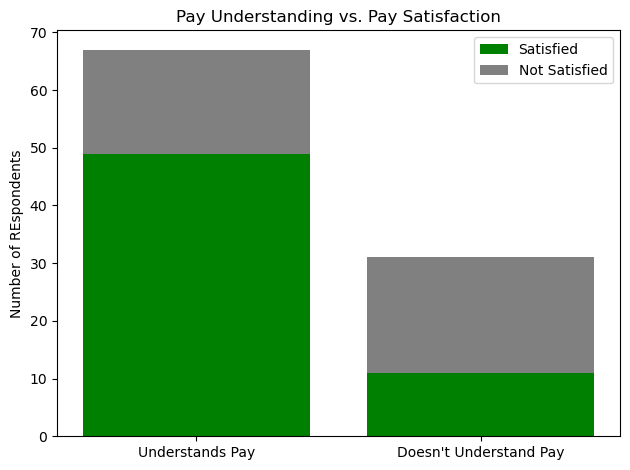

In [18]:
import matplotlib.pyplot as plt

labels = ['Understands Pay', "Doesn't Understand Pay"]
satisfied = [x1, x3]
not_satisfied = [x2, x4]

# Stacked bar chart
fig, ax = plt.subplots()

ax.bar(labels, satisfied, label='Satisfied', color='green')
ax.bar(labels, not_satisfied, bottom=satisfied, label='Not Satisfied', color='gray')

ax.set_ylabel('Number of REspondents')
ax.set_title('Pay Understanding vs. Pay Satisfaction')
ax.legend()

plt.tight_layout()
plt.show()

# Additional Testing

As a supplement to the risk ratio, I want to look at some figures comparing central tendency, which is a great way to illustrate the outcome and show the extent of the gap between the two groups. To start, I'll need to assess the normality of this data, which will tell me what kind of statistical tests would make the most sense here.    

In [19]:
sat_understood = data[(data["I understand how my pay is determined."]> 3)].iloc[:,1] #Isolating pay satisfaction responses grouped by pay understanding. 
sat_not_understood = data[(data["I understand how my pay is determined."]< 3)].iloc[:,1]


In [20]:
from scipy.stats import shapiro

stat1, p1 = shapiro(sat_understood) #Test for normality 
stat2, p2= shapiro(sat_not_understood)
print("p-value = ", round(p1,2), "Test Statistic: ", round(stat1, 2))
print("p-value = ", round(p2,2), "Test Statistic: ", round(stat2, 2))

p-value =  0.0 Test Statistic:  0.89
p-value =  0.0 Test Statistic:  0.9


In [21]:
import statsmodels.api as sm
import numpy as np

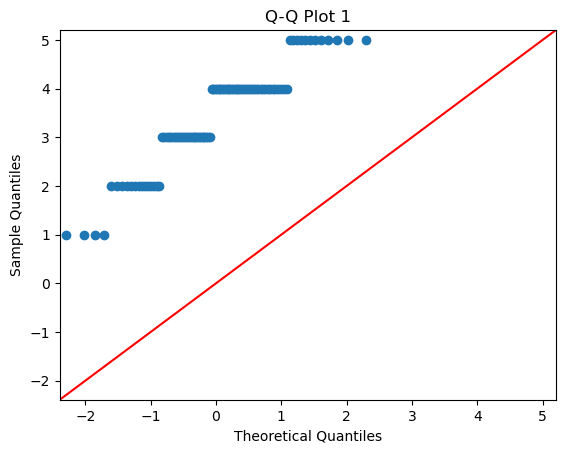

In [22]:
fig = sm.qqplot(sat_understood, line='45') # QQ Plots for a visual test of normality. 
plt.title('Q-Q Plot 1')
plt.show()

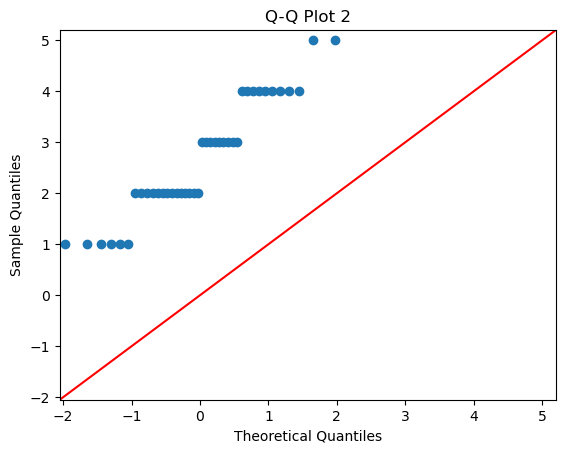

In [23]:
fig = sm.qqplot(sat_not_understood, line='45') 
plt.title('Q-Q Plot 2')
plt.show()

Looking at the Shapiro-Wilks test for both groups, we can reject the null hypothesis that either group comes from a normal distribution. The QQ Plots reinforce this - we can see that the quantiles are far from lining up with a theoretical but normal distribution.

The results point to the need for a non-parametric test. Given that these are independent, non-normally distributed groups using ordinal data, a Mann-Whitney U test would be appropriate. 

In [25]:
sat_understood.astype(float).mean().round(2) # I received an error when I intially tried to run the test. I had to convert the data from integers to floats.
sat_understood = pd.to_numeric(sat_understood, errors='coerce')

sat_not_understood.astype(float).mean().round(2)
sat_not_understood = pd.to_numeric(sat_not_understood, errors='coerce')

In [26]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(sat_understood, sat_not_understood, alternative='two-sided')

In [27]:
print("U statistic:",stat)
print("p-value:", p)

U statistic: 2514.0
p-value: 0.0005420262948217052


Not suprisingly, the test showed a significant p-value, which supports the orginal finding. In short, there does seem to be a relationship between the degree to which an employee understands their pay and how satisfied they are with it. That being said, all this should be considered alongside a couple points:

1. The number of survey participants was a bit low, which is not ideal, especially when breaking responses up into sub-groups.
2. I collected responses from a survey exchange website, mainly used by students. This site incentivizes participating in a high volume of others' surveys to gain more credit and increase visibility of their own. This means that many of the responses could have been "clicked through" without much thought, or submitted by unemployed students.

In any case, I believe this analysis could be easily replicated in an organizational setting to add further support to the results. More importantly, it provides an approach to addressing concerns about employee pay which, if properly executed, could improve employee satisfaction while avoiding excessive and unsustainable pay increases. 